<a href="https://colab.research.google.com/github/asattiraju13/datahackathon/blob/main/basic_multilayer_perceptron_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
# import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.utils import to_categorical
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
import os

data = "C:/Users/antho/Downloads/scBALF-COVID-19/covid-selected-data.csv"
label_file = "C:/Users/antho/Downloads/scBALF-COVID-19/covid-selected-data-labels.csv"

In [ ]:
import io
df = pd.read_csv(data)
labels = pd.read_csv(label_file)

In [ ]:
data = pd.merge(df,labels,on='Unnamed: 0')
data['type'] = data['type'].map({'Normal':0,'Mild':1,'Severe':2})
df = []

X = data.drop('type',axis=1).values  # Apply feature processing, reduction, imbalancing later on / instead of stratified split?
X = X[:,1:]
y = data['type'].values
genes = data.columns[1:2000]
data = []

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.2,train_size=0.8,random_state=0) # n_splits should equal 5
NEpochs = 50

y_pred_all = []; y_all = [];

# Split data into Training + Validation and Test Groups
for train_val_index, test_index in sss.split(X,y):
    X_train_val = X[train_val_index]
    y_train_val = y[train_val_index]
    
    X_test = X[test_index]
    y_test = y[test_index]
    
    # Split Train/Val Data into Training and Validation Groups
    sss2 = StratifiedShuffleSplit(n_splits=1,test_size=0.25,train_size=0.75,random_state=0)
    for train_index, val_index in sss2.split(X_train_val,y_train_val):
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        X_val = X_train_val[val_index]
        y_val = y_train_val[val_index]
        
        X_train_val = []
        y_train_val = []
        
        #%% Create Weights for Model Classes
        values, counts = np.unique(y_train, return_counts=True)
        weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.squeeze(y_train))
        class_weights = dict(zip(values, weights))
        
        # TRAIN AND TEST MODEL HERE
        
        model = Classifier((1999,1))
        history = model.fit(np.expand_dims(X_train,axis=2), to_categorical(y_train), epochs=NEpochs, batch_size=124,shuffle=True,validation_data=(np.expand_dims(X_val,axis=2), to_categorical(np.array(y_val))),class_weight=class_weights) #change trainvalidx when using normalization
        
        y_pred_all.append(model.predict(np.expand_dims(X_test,axis=2)))
        y_all.append(y_test)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 13913 samples, validate on 4638 samples
Epoch 1/50





13913/13913 [==============================] - 12s 880us/step - loss: 1.0954 - acc: 0.4199 - val_loss: 0.9885 - val_acc: 0.5580
Epoch 2/50
13913/13913 [==============================] - 6s 466us/step - loss: 0.9852 - acc: 0.5222 - val_loss: 0.8892 - val_acc: 0.6600
Epoch 3/50
13913/13913 [==============================] - 7s 469us/step - loss: 0.9049 - acc: 0.6101 - val_loss: 0.8129 - val_acc: 0.7001
Epoch 4/50
13913/13913 [==============================] - 6s 432us/step - loss: 0.8140 - acc: 0.6554 - val_loss: 0.7200 - val_acc: 0.7398
Epoch 5/50
13913/13913 [==============================] - 6s 458us/step - loss: 0.7283 - acc: 0.7034 - val_loss: 0.6399 - val_acc: 0.7721
Epoch 6/50
13913/13913 [============

13913/13913 [==============================] - 6s 418us/step - loss: 0.1330 - acc: 0.9521 - val_loss: 0.4451 - val_acc: 0.8898
Epoch 33/50
13913/13913 [==============================] - 6s 454us/step - loss: 0.1326 - acc: 0.9520 - val_loss: 0.4552 - val_acc: 0.8894
Epoch 34/50
13913/13913 [==============================] - 6s 442us/step - loss: 0.1202 - acc: 0.9564 - val_loss: 0.4780 - val_acc: 0.8885
Epoch 35/50
13913/13913 [==============================] - 6s 416us/step - loss: 0.1257 - acc: 0.9549 - val_loss: 0.4820 - val_acc: 0.8892
Epoch 36/50
13913/13913 [==============================] - 6s 439us/step - loss: 0.1215 - acc: 0.9561 - val_loss: 0.4771 - val_acc: 0.8933
Epoch 37/50
13913/13913 [==============================] - 7s 488us/step - loss: 0.1254 - acc: 0.9539 - val_loss: 0.4838 - val_acc: 0.8909
Epoch 38/50
13913/13913 [==============================] - 8s 560us/step - loss: 0.1222 - acc: 0.9568 - val_loss: 0.5110 - val_acc: 0.8890
Epoch 39/50
13913/13913 [==============

Epoch 41/50
13913/13913 [==============================] - 6s 441us/step - loss: 0.1261 - acc: 0.9548 - val_loss: 0.5144 - val_acc: 0.8935
Epoch 42/50
13913/13913 [==============================] - 6s 447us/step - loss: 0.1315 - acc: 0.9545 - val_loss: 0.5625 - val_acc: 0.8890
Epoch 43/50
13913/13913 [==============================] - 6s 433us/step - loss: 0.1231 - acc: 0.9546 - val_loss: 0.5637 - val_acc: 0.8885
Epoch 44/50
13913/13913 [==============================] - 6s 435us/step - loss: 0.1220 - acc: 0.9553 - val_loss: 0.5386 - val_acc: 0.8924
Epoch 45/50
13913/13913 [==============================] - 7s 468us/step - loss: 0.1241 - acc: 0.9569 - val_loss: 0.5469 - val_acc: 0.8935
Epoch 46/50
13913/13913 [==============================] - 6s 450us/step - loss: 0.1162 - acc: 0.9583 - val_loss: 0.5839 - val_acc: 0.8862
Epoch 47/50
13913/13913 [==============================] - 7s 481us/step - loss: 0.1141 - acc: 0.9597 - val_loss: 0.5562 - val_acc: 0.8909
Epoch 48/50
13913/13913 [==

13913/13913 [==============================] - 4s 319us/step - loss: 0.6292 - acc: 0.7091 - val_loss: 0.5735 - val_acc: 0.7863
Epoch 8/50
13913/13913 [==============================] - 5s 332us/step - loss: 0.5704 - acc: 0.7393 - val_loss: 0.5409 - val_acc: 0.7971
Epoch 9/50
13913/13913 [==============================] - 5s 328us/step - loss: 0.5403 - acc: 0.7551 - val_loss: 0.5088 - val_acc: 0.8144
Epoch 10/50
13913/13913 [==============================] - 5s 325us/step - loss: 0.4865 - acc: 0.7797 - val_loss: 0.4875 - val_acc: 0.8226
Epoch 11/50
13913/13913 [==============================] - 4s 308us/step - loss: 0.4547 - acc: 0.7970 - val_loss: 0.4633 - val_acc: 0.8301
Epoch 12/50
13913/13913 [==============================] - 4s 313us/step - loss: 0.4129 - acc: 0.8138 - val_loss: 0.4390 - val_acc: 0.8473
Epoch 13/50
13913/13913 [==============================] - 4s 307us/step - loss: 0.3889 - acc: 0.8240 - val_loss: 0.4172 - val_acc: 0.8583
Epoch 14/50
13913/13913 [================

Text(0, 0.5, 'Accuracy')

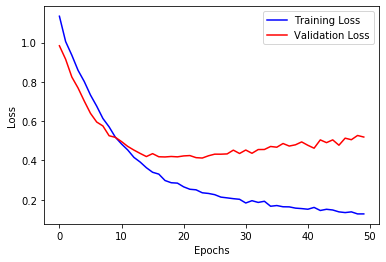

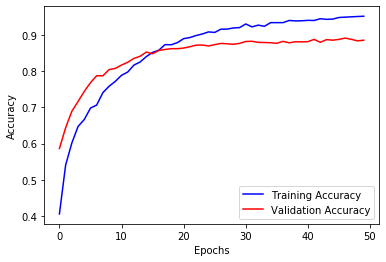

In [ ]:
# Plot Cross Validaton Results for Each Fold
plt.figure()
plt.plot(history.history['loss'],'b',label='Training Loss')
plt.plot(history.history['val_loss'],'r',label='Validation Loss')
plt.legend()
    
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(history.history['acc'],'b',label='Training Accuracy')
plt.plot(history.history['val_acc'],'r',label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Unpack Test Results
precision = []; recall = []; f1 = [];
for i in range(5):
    metrics = np.array(precision_recall_fscore_support(np.array(y_all)[i,:], np.argmax(np.array(y_pred_all)[i,...],axis=1), beta=1.0, average=None))
    precision.append(np.array(metrics)[0,:])
    recall.append(np.array(metrics)[1,:])
    f1.append(np.array(metrics)[2,:])

print('Precision')
print(str(np.mean(precision,axis=0)) + ' + ' + str(np.std(precision,axis=0)))
print('Recall')
print(str(np.mean(recall,axis=0)) + ' + ' + str(np.std(recall,axis=0)))
print('F1')
print(str(np.mean(f1,axis=0)) + ' + ' + str(np.std(f1,axis=0)))

Precision
[0.89215047 0.82055711 0.92004593] + [0.00335422 0.02219356 0.00970015]
Recall
[0.94156928 0.62462006 0.93383838] + [0.01173671 0.01732789 0.01106798]
F1
[0.91614731 0.70907881 0.92681016] + [0.0051949  0.01494278 0.00573638]


In [ ]:
# Returns Compiled Model for Classifier 1 (Awake v Sleep)

def Classifier(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(28,kernel_initializer='he_normal', bias_initializer='zeros')) # Kaiming He initialization
    model.add(Activation('relu')) 
    model.add(Dropout(0.4))
    model.add(Dense(24,kernel_initializer='he_normal', bias_initializer='zeros')) # Kaiming He initialization
    model.add(Activation('relu')) 
    model.add(Dropout(0.4))
    model.add(Dense(3))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(lr=0.0005) # a smaller learning rate is better for Adam; otherwise, it's validation accuracy is highly inconsistent; good with batch_size=168
    sgd = optimizers.SGD(lr=0.000001, momentum=0.9)

    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return(model)